In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

In [3]:
def monte_carlo_circle_area(samples):
    inside_circle = 0

    # Per la visualizzazione
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(samples):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)  # Punti casuali nel quadrato
        distance = x**2 + y**2  # Distanza dal centro
        if distance <= 1:  # Se il punto è dentro il cerchio
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    # Calcolo dell'area
    area_estimate = (inside_circle / samples) * 4

    # Visualizzazione
    fig, ax = plt.subplots(figsize=(4, 4))
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)
    ax.scatter(x_inside, y_inside, color='gray', s=1)
    ax.scatter(x_outside, y_outside, color='blue', s=1)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', adjustable='box')
    plt.title(f"Stima dell'Area del Cerchio con {samples} Campioni")
    plt.show()

    return area_estimate

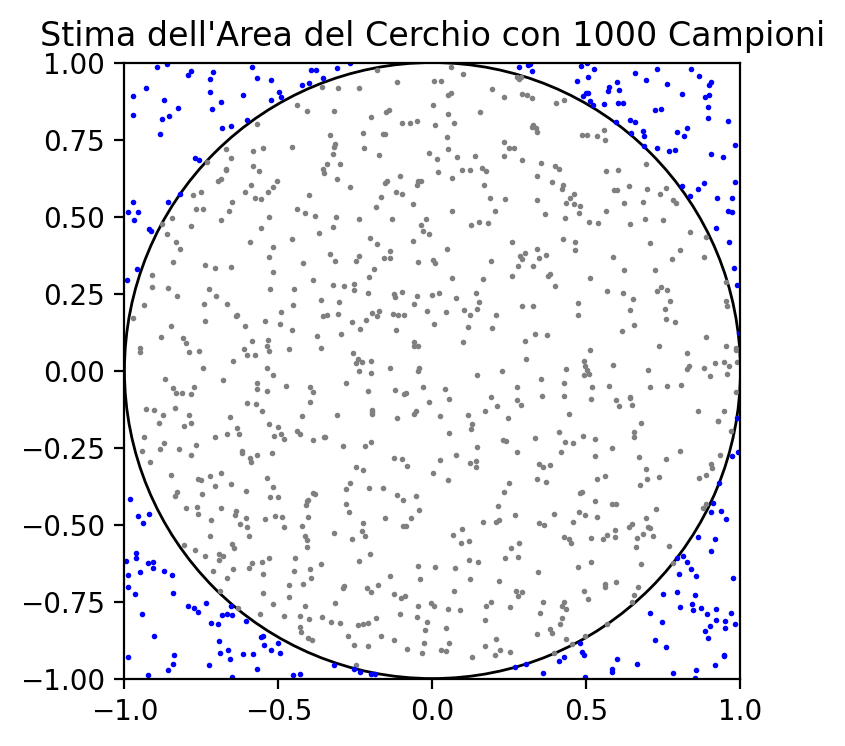

3.088

In [4]:
estimated_area = monte_carlo_circle_area(1000)
estimated_area

In [5]:
def calcola_area_cerchio_metodo_monte_carlo(numero_campioni):
    """
    Calcola l'area di un cerchio di raggio unitario utilizzando il metodo di Monte Carlo.
    
    Args:
    numero_campioni (int): Numero di punti casuali generati per la stima.
    
    Returns:
    float: Stima dell'area del cerchio.
    """
    
    punti_dentro_cerchio = 0  # Contatore per i punti che cadono all'interno del cerchio

    # Generazione di punti casuali e verifica se cadono all'interno del cerchio
    for _ in range(numero_campioni):
        x, y = np.random.uniform(-1, 1, size=2)  # Genera coordinate x, y casuali nel quadrato [-1, 1]x[-1, 1]
        distanza_dal_centro = x**2 + y**2  # Calcola la distanza quadratica dal centro (0,0)
        
        # Controlla se il punto (x, y) è all'interno del cerchio di raggio 1
        if distanza_dal_centro <= 1:
            punti_dentro_cerchio += 1

    # Calcolo dell'area stimata del cerchio usando il rapporto dei punti all'interno del cerchio
    # rispetto al numero totale di campioni, moltiplicato per l'area del quadrato circoscritto (4).
    area_stimata = (punti_dentro_cerchio / numero_campioni) * 4

    return area_stimata


In [6]:
calcola_area_cerchio_metodo_monte_carlo(100000)

3.15276